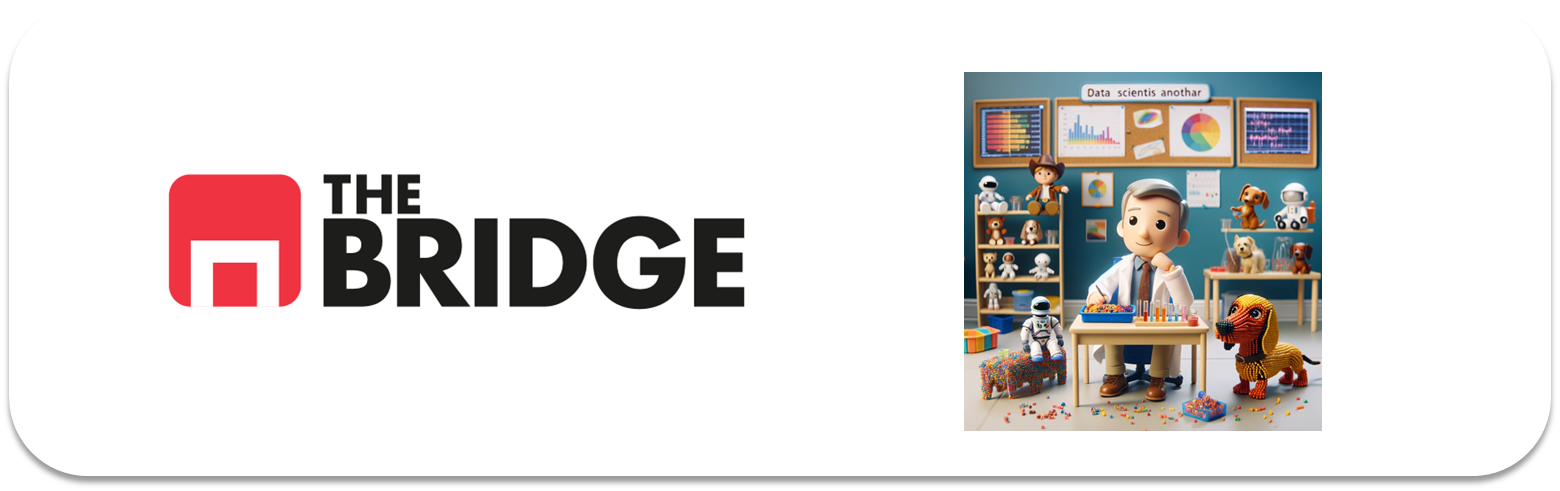

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [1]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```sns.load_dataset(<nombre_del_dataset>)``` a una variable "df_titanic"

In [4]:
print(sns.get_dataset_names())
df_titanic = sns.load_dataset('titanic')
df_titanic


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [14]:
df_titanic.info()
df_titanic.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   fare         891 non-null    float64 
 6   embarked     889 non-null    object  
 7   class        891 non-null    category
 8   who          891 non-null    object  
 9   adult_male   891 non-null    bool    
 10  deck         203 non-null    category
 11  embark_town  889 non-null    object  
 12  alive        891 non-null    object  
 13  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(3), object(5)
memory usage: 73.7+ KB


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [15]:
# Columnas con más numlos, deck y age
porcentaje_nulos = df_titanic.isnull().sum() / len(df_titanic) * 100
print(porcentaje_nulos)

survived        0.000000
pclass          0.000000
sex             0.000000
age            19.865320
sibsp           0.000000
fare            0.000000
embarked        0.224467
class           0.000000
who             0.000000
adult_male      0.000000
deck           77.216611
embark_town     0.224467
alive           0.000000
alone           0.000000
dtype: float64


In [16]:
#Eliminamos parch, ahora da error porque está rehecho
df_titanic = df_titanic.drop(columns=['parch'])


KeyError: "['parch'] not found in axis"

In [8]:
# Se inspeccionan Deck y age al ser los que más nulos tienen
df_titanic["age"].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [9]:
df_titanic["deck"].unique()


[NaN, 'C', 'E', 'G', 'D', 'A', 'B', 'F']
Categories (7, object): ['A', 'B', 'C', 'D', 'E', 'F', 'G']

In [17]:
df_titanic[['deck', 'class', 'pclass']]

dfinvestigacion_class3= df_titanic[df_titanic['class'] == 'Third'][['deck', 'class', 'pclass']]
dfinvestigacion_class3["pclass"].unique()
print(dfinvestigacion_class3)
#por lo tanto deck NAN es la de la clase 3 que no tenían acceso a cubierta. Se sugiere cambiar NAN de deck por "ninguna"


    deck  class  pclass
0    NaN  Third       3
2    NaN  Third       3
4    NaN  Third       3
5    NaN  Third       3
7    NaN  Third       3
..   ...    ...     ...
882  NaN  Third       3
884  NaN  Third       3
885  NaN  Third       3
888  NaN  Third       3
890  NaN  Third       3

[491 rows x 3 columns]


In [18]:
filas_nulas = df_titanic[df_titanic.isnull().any(axis=1)]
print(filas_nulas.head())


   survived  pclass     sex   age  sibsp     fare embarked  class    who  \
0         0       3    male  22.0      1   7.2500        S  Third    man   
2         1       3  female  26.0      0   7.9250        S  Third  woman   
4         0       3    male  35.0      0   8.0500        S  Third    man   
5         0       3    male   NaN      0   8.4583        Q  Third    man   
7         0       3    male   2.0      3  21.0750        S  Third  child   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
2       False  NaN  Southampton   yes   True  
4        True  NaN  Southampton    no   True  
5        True  NaN   Queenstown    no   True  
7       False  NaN  Southampton    no  False  


In [19]:
#se decide aplicar la media de age a valores nulos y  deck a valores nulos cambiarlos por "ninguna"
media_age = df_titanic["age"].mean()
df_titanic_ajust = df_titanic.copy()
df_titanic_ajust["age"] = df_titanic_ajust["age"].fillna(media_age)

valor_ajuste = "-1"  # Valor como cadena
df_titanic_ajust["deck"] = df_titanic_ajust["deck"].fillna(valor_ajuste)

df_titanic_ajust.info()



TypeError: Cannot setitem on a Categorical with a new category (-1), set the categories first

#como falla pongo la moda
media_age = df_titanic["age"].mean()
df_titanic_ajust = df_titanic.copy()
df_titanic_ajust["age"] = df_titanic_ajust["age"].fillna(media_age)
moda_deck = df_titanic["deck"].mode()
df_titanic_ajust["deck"] = df_titanic_ajust["deck"].fillna(moda_deck)

df_titanic_ajust.info()


### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.




| Columna/Variable | Descripción |
| ---------------- | ----------- |
| survived            |  supervivientes del naufragio |
| pclass            |  clase de su billete |
| sex                      |  género pasajeros|
| age            |  edad pasajeros |
| sibsp                    |  numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros) |
| fare            |  supervivientes del naufragio |
| embarked            |  Es la incial de la letra de la ciudad donde embarco |
| class                    |  clase de su billete |
| who                      |  Es la incial de la letra de la ciudad donde embarco |
| adult_male               |  Adulto varón |
| deck                     |  Cubierta |
| embark_town              | Pueblo de embarco |
| alive                    |  superviviente |
| alone            |  solo |




### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

Southampton, Cherburgo y Queenstow

In [65]:
# embarked como embark town
df_titanic_ajust["embark_town"].unique()

df_titanic_ajust["embarked"].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}, inplace=True)


C:\Users\mfm-8\AppData\Local\Temp\ipykernel_10832\2005064295.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_titanic_ajust["embarked"].replace({"S": "Southampton", "C": "Cherbourg", "Q": "Queenstown"}, inplace=True)


In [66]:
df_titanic_ajust

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.000000,1,7.2500,Southampton,Third,man,True,C,Southampton,no,False
1,1,1,female,38.000000,1,71.2833,Cherbourg,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.000000,0,7.9250,Southampton,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.000000,1,53.1000,Southampton,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.000000,0,8.0500,Southampton,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,13.0000,Southampton,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.000000,0,30.0000,Southampton,First,woman,False,B,Southampton,yes,True
888,0,3,female,29.699118,1,23.4500,Southampton,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.000000,0,30.0000,Cherbourg,First,man,True,C,Cherbourg,yes,True


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

In [67]:
# Se realiza el estudio de tipo de dato


data = {
    "Columna/Variable":["survived","who","age","fare","class","embarked","alone"],
    "Descripción": [
                    "Se trata de la variable que indica superviviente", 
                    "Se trata de la variable que indica el sexo de la persona", 
                    "Se trata de la variable que indica la edad de la persona", 
                    "Se trata de la variable que indica el precio del billete",
                    "Se trata de la variable que indica la clase  del billete",
                    "Se trata de la variable que indica el área de embarque",
                    "Se trata de la variable que indica si iba solo"],
    "Tipo_de_Variable": [ "N. Discreta", "C. Nominal", "N.Discreta", "N. Continua", "C. Ordinal","C.Nominal","N. Binaria"], 
    "Importancia inicial": [0, 2, 1, 1,1,2,2],
    "Nota": [ "", "", "", "", "", "", ""]
}

["survived","who","age","fare","class","embarked","alone"]



df_tipificacion = pd.DataFrame(data)

umbral_categoria = 10
umbral_continua = 70
resultado = cardinalidad(df_tipificacion, umbral_categoria, umbral_continua)

print(resultado)



  Columna/Variable                                        Descripción  \
0         survived   Se trata de la variable que indica superviviente   
1              who  Se trata de la variable que indica el sexo de ...   
2              age  Se trata de la variable que indica la edad de ...   
3             fare  Se trata de la variable que indica el precio d...   
4            class  Se trata de la variable que indica la clase  d...   
5         embarked  Se trata de la variable que indica el área de ...   
6            alone     Se trata de la variable que indica si iba solo   

  Tipo_de_Variable  Importancia inicial Nota  Asignación  
0      N. Discreta                    0       Categórica  
1       C. Nominal                    2          Binaria  
2       N.Discreta                    1       Categórica  
3      N. Continua                    1       Categórica  
4       C. Ordinal                    1       Categórica  
5        C.Nominal                    2          Binaria  
6 

### #2.1 Categóricas

In [68]:
# Se van a evaluar: who, class, embarked 

categoricas=["who", "class", "embarked"] 




In [69]:

#Se revisan moda
print("Moda")
df_titanic_ajust[categoricas].mode().T

Moda


,0
who,man
class,Third
embarked,Southampton


In [72]:
# Se va a pintar la distribución de variables categóricas
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [73]:
# Se analizan las frecuencias absolutas
for catego in categoricas:
    print(f" Para {catego}")
    print(df_titanic_ajust[catego].value_counts())
    print("\n"*2)


 Para who
who
man      537
woman    271
child     83
Name: count, dtype: int64



 Para class
class
Third     491
First     216
Second    184
Name: count, dtype: int64



 Para embarked
embarked
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64





La frecuencia absoluta más repetida en cuanto a quién embarcó es hombres, duplicaban prácticamente a mujeres, también había niños)
La frecuencia absoluta más repetida en cuanto a la clase es tercera que supone más del doble de los de primera y supera la suma de primera y segunda clase
La frecuencia absoluta más repetida en cuanto al embarque es Southampton


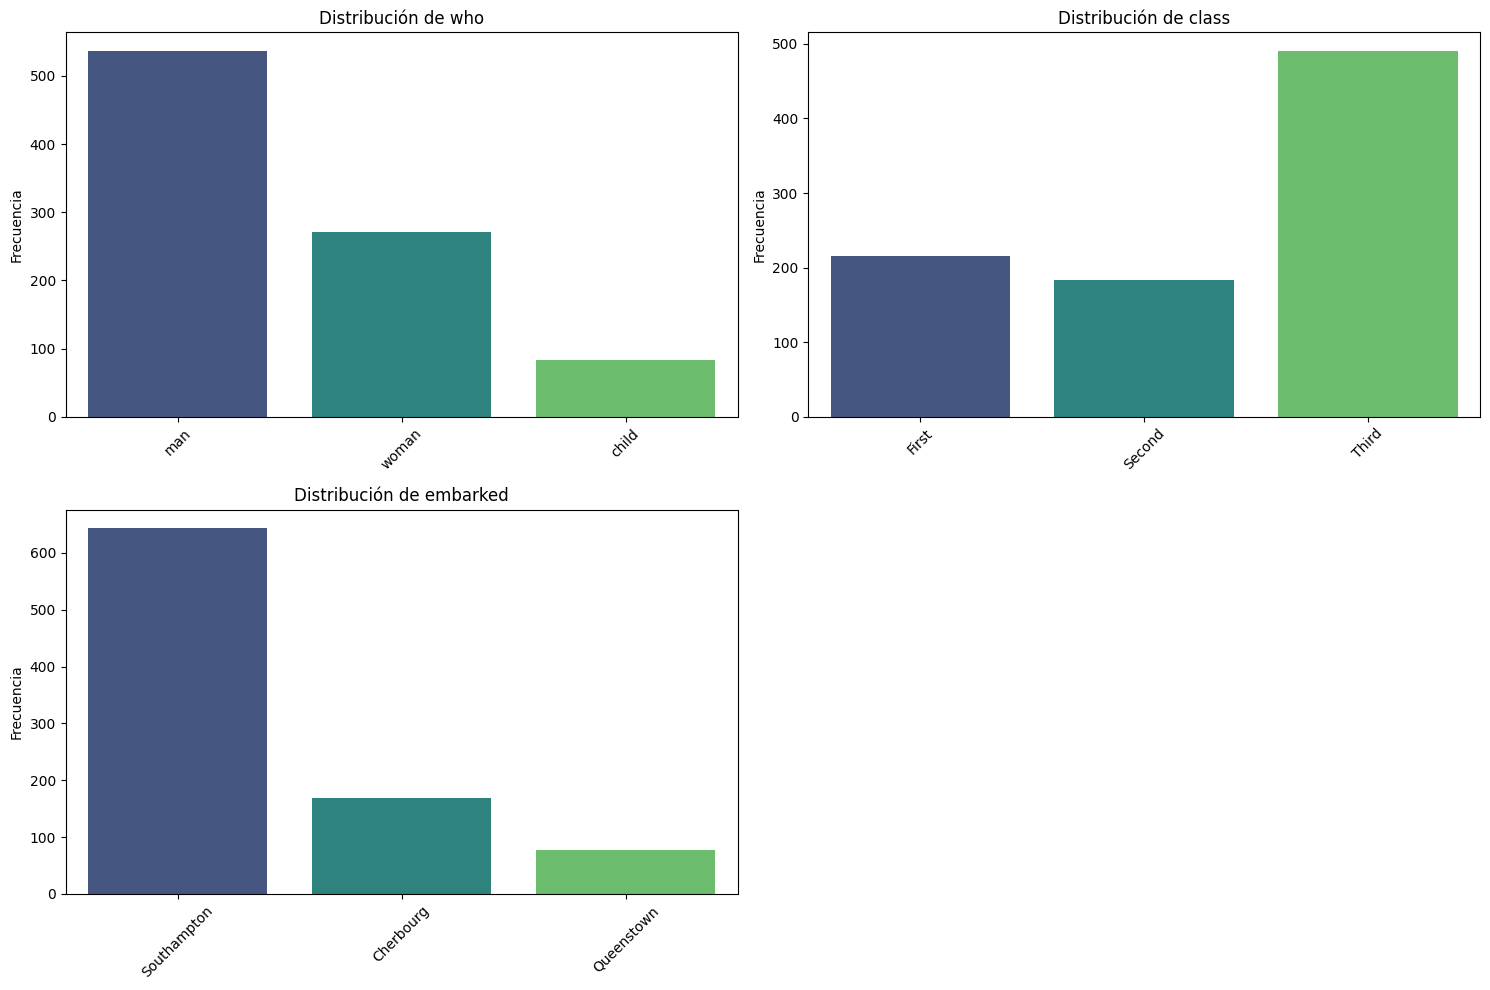

In [76]:
# Se analizan y representan gráficamente las frecuencias absolutas

print(f"La frecuencia absoluta más repetida en cuanto a quién embarcó es hombres, duplicaban prácticamente a mujeres, también había niños)")

print(f"La frecuencia absoluta más repetida en cuanto a la clase es tercera que supone más del doble de los de primera y supera la suma de primera y segunda clase")

print(f"La frecuencia absoluta más repetida en cuanto al embarque es Southampton")

pinta_distribucion_categoricas(df_titanic_ajust,categoricas)



La frecuencia relativa más repetida en cuanto a quién embarcó es hombres, casi el 60% de los pasajeros, el 30% eran mujeres y el 10% niños
La frecuencia relativa más repetida en cuanto a la clase es tercera, en torno al 60% de los pasajeros viajaron en dicha clase, el 22% aproximadamente en primera clase y el 20% en segunda
La frecuencia relativa más repetida en cuanto al embarque es la letra Southampton, el 70%, en torno al 20% Cherbourg y el 10% restante Queenstwon


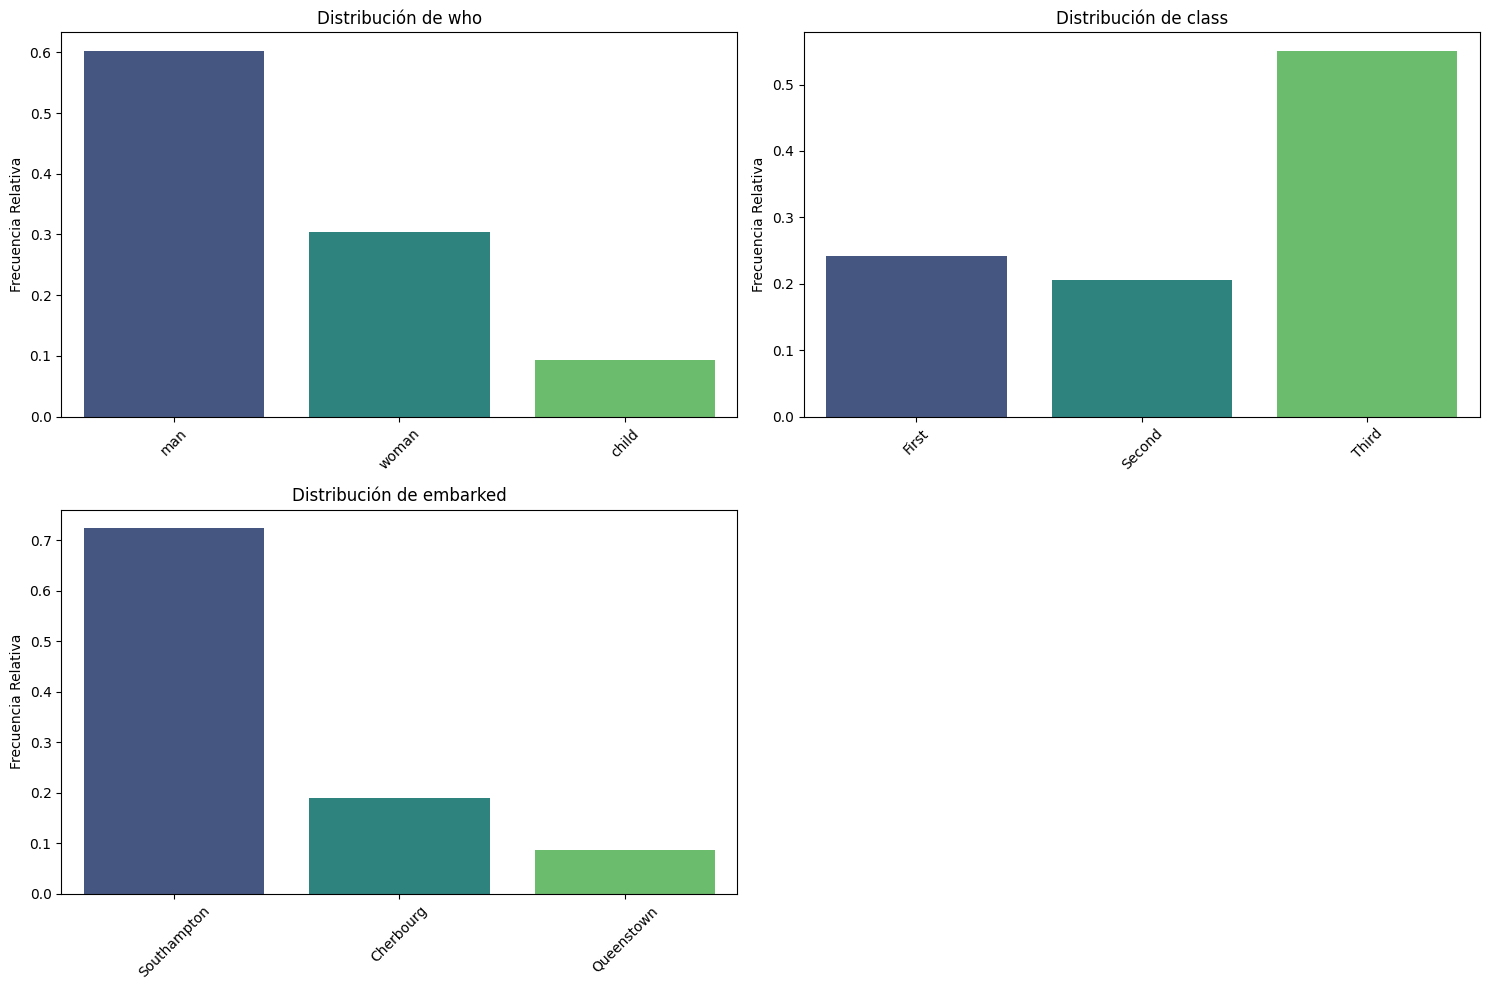

In [77]:
# Se analizan y representan gráficamente las frecuencias relativas
5
print(f"La frecuencia relativa más repetida en cuanto a quién embarcó es hombres, casi el 60% de los pasajeros, el 30% eran mujeres y el 10% niños")

print(f"La frecuencia relativa más repetida en cuanto a la clase es tercera, en torno al 60% de los pasajeros viajaron en dicha clase, el 22% aproximadamente en primera clase y el 20% en segunda")

print(f"La frecuencia relativa más repetida en cuanto al embarque es la letra Southampton, el 70%, en torno al 20% Cherbourg y el 10% restante Queenstwon")

pinta_distribucion_categoricas(df_titanic_ajust,categoricas,relativa=True)



In [ ]:
from bootcampviztools import plot_multiple_boxplots

plot_categorical_relationship_fin(df, cat_col1, cat_col2, relative_freq=False, show_values=False, size_group = 5)

plot_categorical_numerical_relationship(df, categorical_col, numerical_col, show_values=False, measure='mean'):

plot_combined_graphs(df, columns, whisker_width=1.5, bins = None):
plot_grouped_boxplots(df, cat_col, num_col):
def plot_grouped_histograms(df, cat_col, num_col, group_size):
def grafico_dispersion_con_correlacion(df, columna_x, columna_y, tamano_puntos=50, mostrar_correlacion=False):

def bubble_plot(df, col_x, col_y, col_size, scale = 1000):



La tercera clase era predominante tanto en hombres, como mujeres y niños, pero se observa que en hombres 
 y niños su mayoría iban en tercera,60% y 70% respectivamente. También bastantes niños en segunda.
 mientras que mujeres estaban más repartidas habiendo una cifra considerable 
 en primera de entorno al 35%, de hecho según se descendía de clase había menos mujeres
Frecuencia absoluta


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


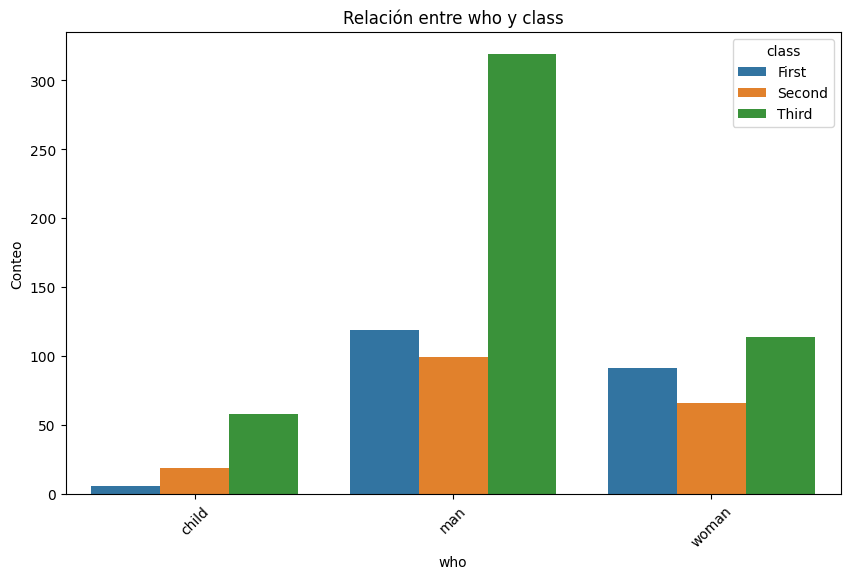

Frecuencia relativa


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


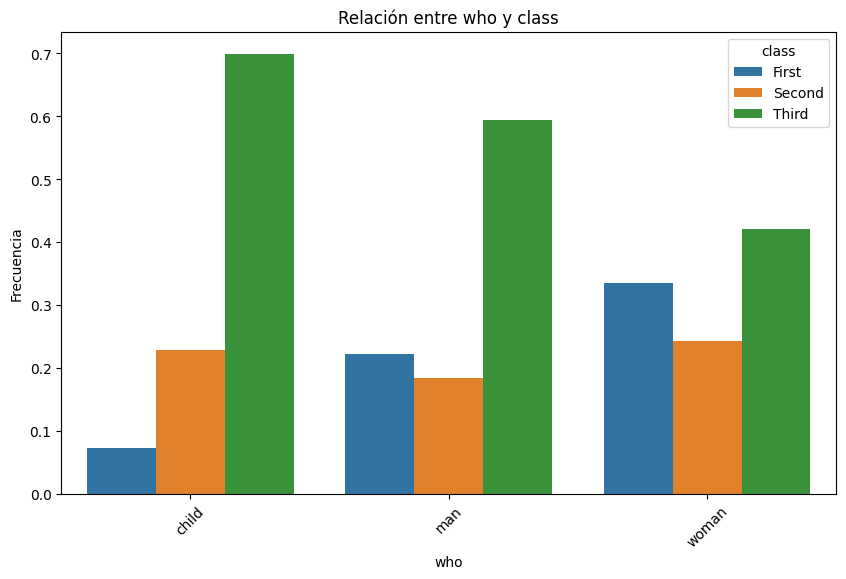

Frecuencia relativa alterando columnas para profundizar


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


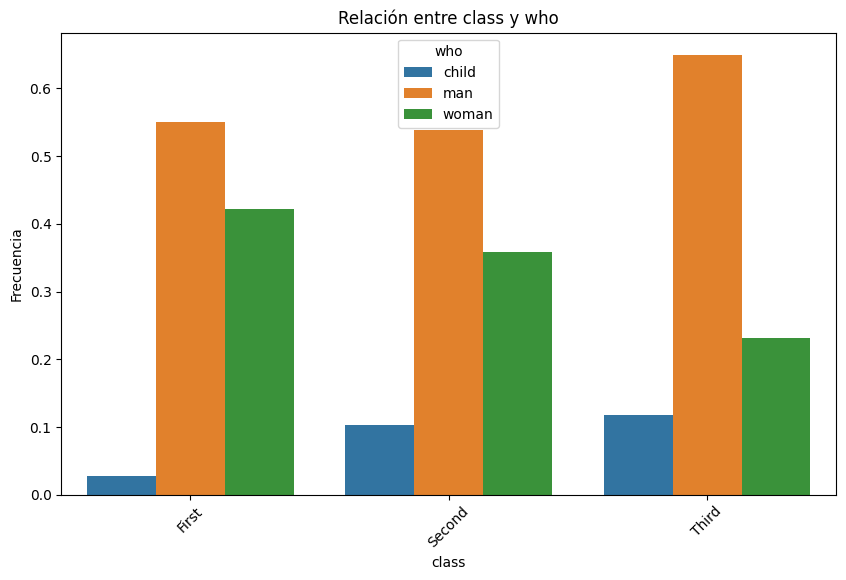

En todos los puertos el peso de hombres era mayor, si bien en Queensland hubo cifras simmilares
  de hombres y mujeres, donde más despunta la presencia de hombres es en el embarque de Southampton
 . Cherbourg era un puerto francés minoritario y de clase alta, Southampton en UK fue el principal de embarque,
 mientras Queenstown fue el último puerto de subida, en Irlanda y menos empleado
Frecuencia absoluta


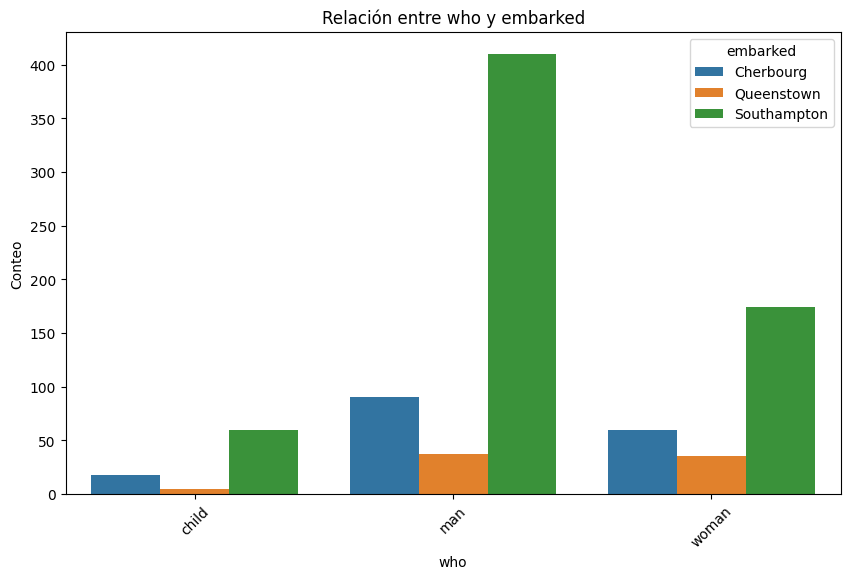

Frecuencia relativa alterando el orden de columnas para profundizar


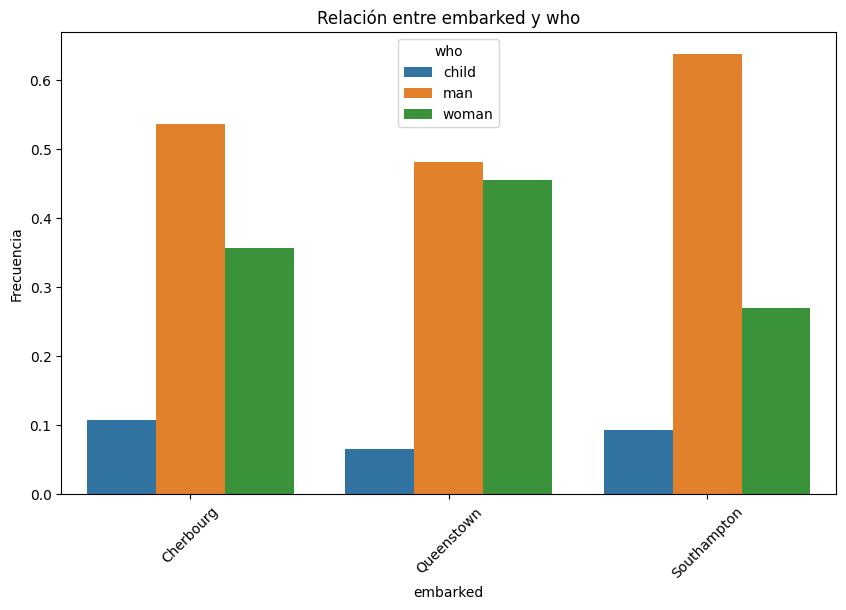

Queensland fue un puerto de embarque de pasajeros de tercera,
  Cherbourg de primera y Southampton principalmente de tercera pero con más variedad
Frecuencia absoluta


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


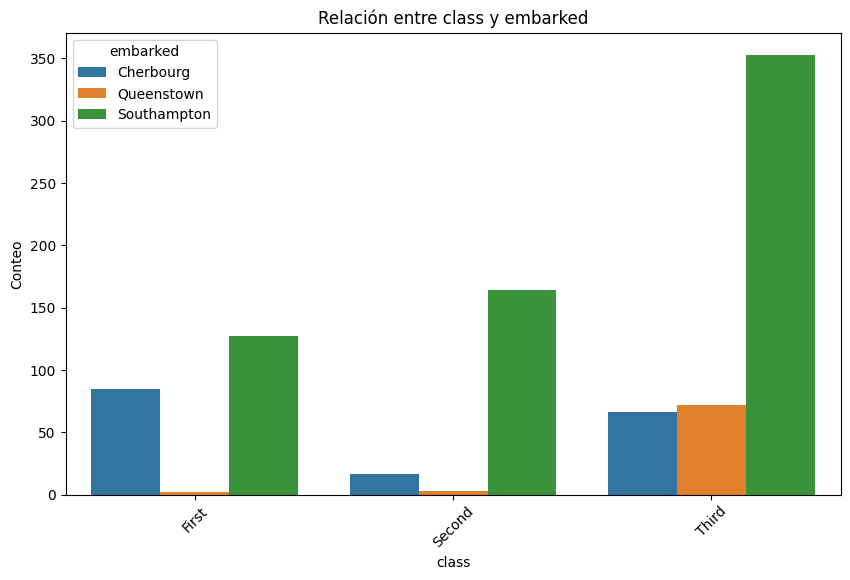

Frecuencia relativa


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


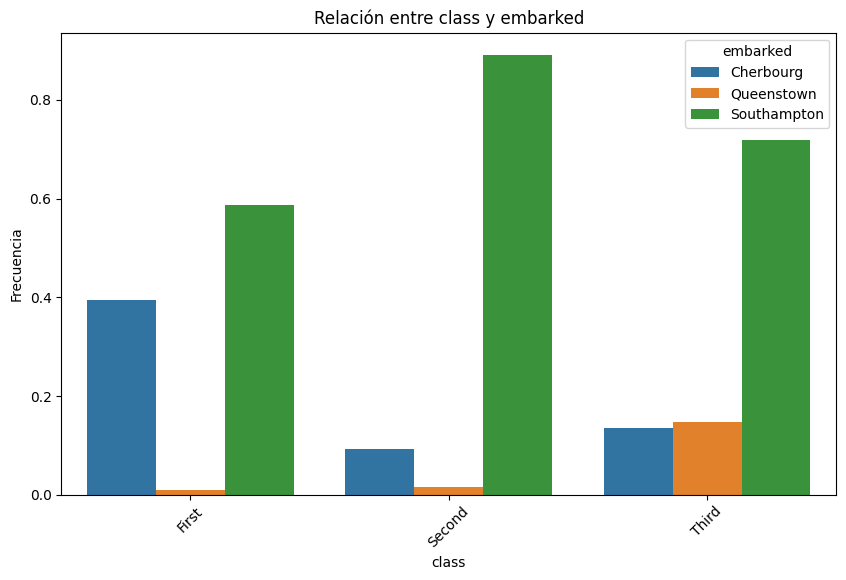

Frecuencia relativa alterada para profundizar


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  count_data = df.groupby([cat_col1, cat_col2]).size().reset_index(name='count')


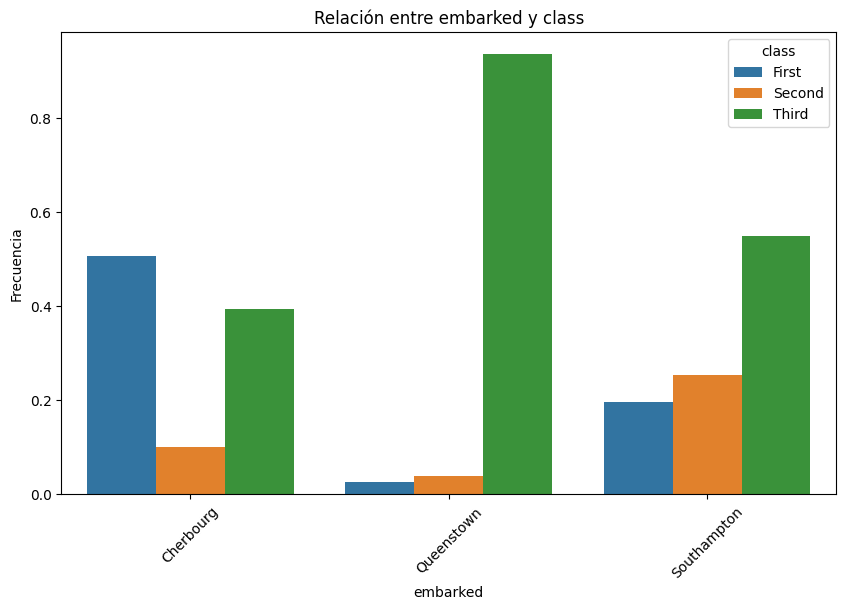

In [123]:

# Revisamos relación entre categoricas=["who", "class", "embarked"]  con frecuencias absolutas 
from bootcampviztools import plot_categorical_relationship_fin

print(f"La tercera clase era predominante tanto en hombres, como mujeres y niños, pero se observa que en hombres \n y niños su mayoría iban en tercera,60% y 70% respectivamente. También bastantes niños en segunda.\n mientras que mujeres estaban más repartidas habiendo una cifra considerable \n en primera de entorno al 35%, de hecho según se descendía de clase había menos mujeres")
print(f"Frecuencia absoluta")
plot_categorical_relationship_fin(df_titanic_ajust, "who","class", relative_freq=False, show_values=False, size_group = 5)
print(f"Frecuencia relativa")
plot_categorical_relationship_fin(df_titanic_ajust, "who","class", relative_freq=True, show_values=False, size_group = 5)
print(f"Frecuencia relativa alterando columnas para profundizar")
plot_categorical_relationship_fin(df_titanic_ajust, "class","who", relative_freq=True, show_values=False, size_group = 5)



print(f"En todos los puertos el peso de hombres era mayor, si bien en Queensland hubo cifras simmilares\n  de hombres y mujeres, donde más despunta la presencia de hombres es en el embarque de Southampton\n . Cherbourg era un puerto francés minoritario y de clase alta, Southampton en UK fue el principal de embarque,\n mientras Queenstown fue el último puerto de subida, en Irlanda y menos empleado")
print(f"Frecuencia absoluta")
plot_categorical_relationship_fin(df_titanic_ajust, "who","embarked", relative_freq=False, show_values=False, size_group = 5)
print(f"Frecuencia relativa alterando el orden de columnas para profundizar")
plot_categorical_relationship_fin(df_titanic_ajust, "embarked","who", relative_freq=True, show_values=False, size_group = 5)


print(f"Queensland fue un puerto de embarque de pasajeros de tercera,\n  Cherbourg de primera y Southampton principalmente de tercera pero con más variedad")
print(f"Frecuencia absoluta")
plot_categorical_relationship_fin(df_titanic_ajust, "class","embarked", relative_freq=False, show_values=False, size_group = 5)
print(f"Frecuencia relativa")
plot_categorical_relationship_fin(df_titanic_ajust, "class","embarked", relative_freq=True, show_values=False, size_group = 5)
print(f"Frecuencia relativa alterada para profundizar")
plot_categorical_relationship_fin(df_titanic_ajust,"embarked","class", relative_freq=True, show_values=False, size_group = 5)


### #2.2 Numéricas

In [79]:
# Se van a evaluar: survived, age, fare y alone


df_titanic_ajust.describe()
#También podría hacerse así: print("Media") df_titanic_ajust.describe().loc["mean"]


,survived,pclass,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,32.204208
std,0.486592,0.836071,13.002015,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,29.699118,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [103]:
def variabilidad(df):
    df_var=df.describe().loc[["std","mean"]].T
    df_var["CV"]=df_var["std"]/df_var["mean"]
    return df_var

print(f"son coeficientes de variacion superiores al 30% lo que a menudo se considera alta variabilidad")
variabilidad(df_titanic_ajust)


son coeficientes de variacion superiores al 30% lo que a menudo se considera alta variabilidad


,std,mean,CV
survived,0.486592,0.383838,1.267701
pclass,0.836071,2.308642,0.362149
age,13.002015,29.699118,0.437791
sibsp,1.102743,0.523008,2.108464
fare,49.693429,32.204208,1.543073


In [81]:
rango = df_titanic_ajust.describe().loc["max"]- df_titanic_ajust.describe().loc["min"]

print("\nRango (max-min):")
print(rango)


Rango (max-min):
survived      1.0000
pclass        2.0000
age          79.5800
sibsp         8.0000
fare        512.3292
dtype: float64


In [95]:
# Índice intercuantílico
def get_IQR(df, col):
    return df[col].quantile(0.75) - df[col].quantile(0.25)

iqr_age = get_IQR(df_titanic_ajust, "age")
print(f"IQR de edad da {iqr_age}. Es significativamente menor al rango de edad y mediana, \nlo que sugiere que podría haber poca dispersión en la edad de pasajeros, \ntendente a ser homogénea y de media unos 29 años.\n")

iqr_fare = get_IQR(df_titanic_ajust, "fare")
print(f"IQR de fare da {iqr_fare}. Es significativamente menor al rango de edad y mayor a la mediana, \nlo que sugiere que la dispersión de los datos entre el primer y tercer cuartil es considerable, \npero que no hay valores extremos que estén inflando el rango total.\n")

iqr_surv = get_IQR(df_titanic_ajust, "survived")
print(f"IQR de survived da {iqr_surv}. Es igual al rango de edad y mayor que la mediana, \nlo que sugiere que la mayor parte de la variabilidad en los datos está concentrada en una amplia gama de valores que van \ndesde el primer hasta el tercer cuartil. Además, indica que hay una presencia considerable de valores atípicos\n en los datos que están contribuyendo al rango total y desplazando la mediana hacia valores más bajos en comparación con el tercer cuartil.\n")

iqr_pcla = get_IQR(df_titanic_ajust, "pclass")
print(f"IQR de pclass da {iqr_pcla}. Es significativamente menor al rango de edad y mediana, \nlo que sugiere que podría haber poca dispersión.\n")

iqr_sis 


IQR de edad da 13.0. Es significativamente menor al rango de edad y mediana, 
lo que sugiere que podría haber poca dispersión en la edad de pasajeros, 
tendente a ser homogénea y de media unos 29 años.

IQR de fare da 23.0896. Es significativamente menor al rango de edad y mayor a la mediana, 
lo que sugiere que la dispersión de los datos entre el primer y tercer cuartil es considerable, 
pero que no hay valores extremos que estén inflando el rango total.

IQR de survived da 1.0. Es igual al rango de edad y mayor que la mediana, 
lo que sugiere que la mayor parte de la variabilidad en los datos está concentrada en una amplia gama de valores que van 
desde el primer hasta el tercer cuartil. Además, indica que hay una presencia considerable de valores atípicos
 en los datos que están contribuyendo al rango total y desplazando la mediana hacia valores más bajos en comparación con el tercer cuartil.

IQR de pclass da 1.0. Es significativamente menor al rango de edad y mediana, 
lo que sugi

1.0

Age y Fare son las que presentan más valores fuera de rango


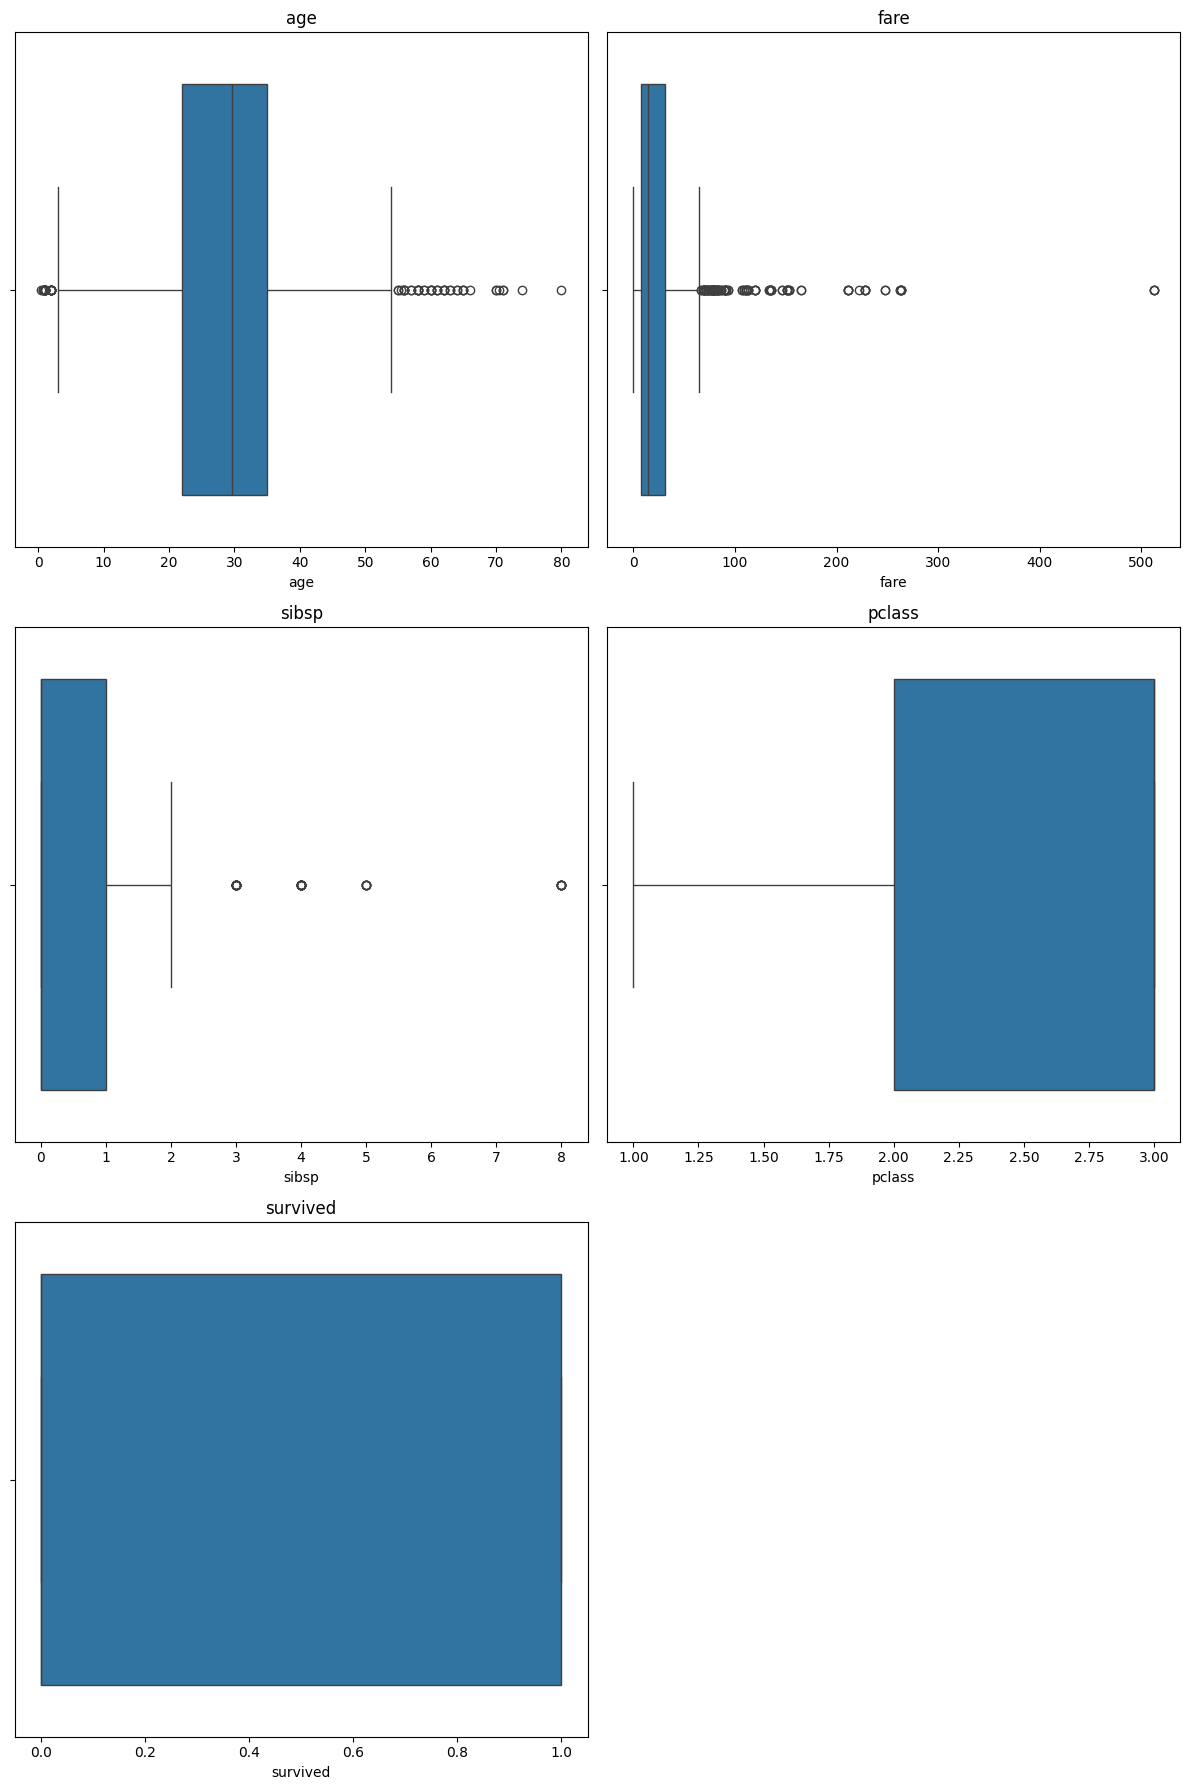

In [99]:
colum_numericas= {"survived","pclass","age","sibsp", "fare"}
#como no aparece esta función en el archivo de bootcamp se pega aquí:
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

print(f"Age y Fare son las que presentan más valores fuera de rango")
plot_multiple_boxplots(df_titanic_ajust,colum_numericas)

Survived tiene valores binarios
(2,)


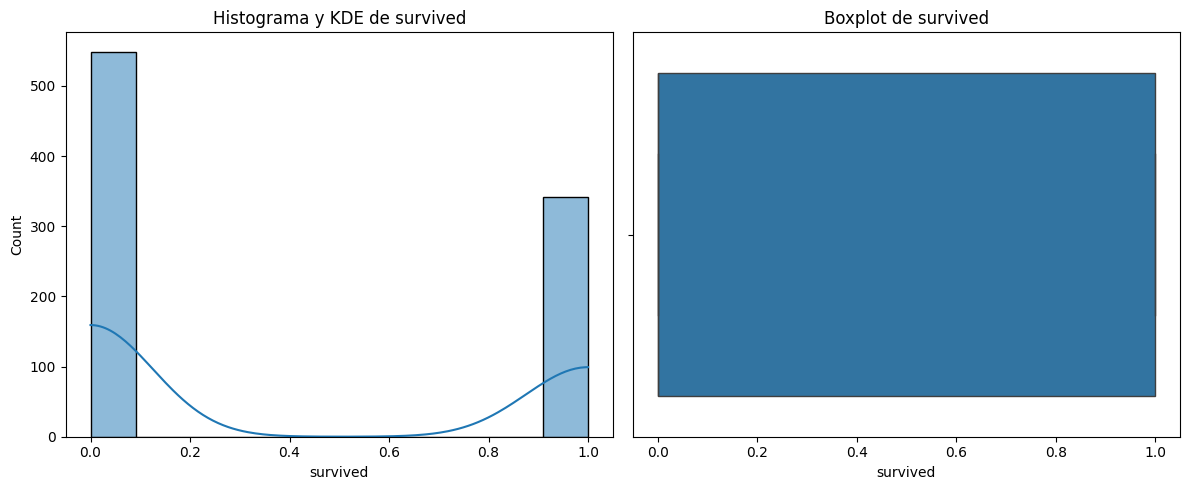

P Class tiene 3 valores siendo tercera clase el predominante
(2,)


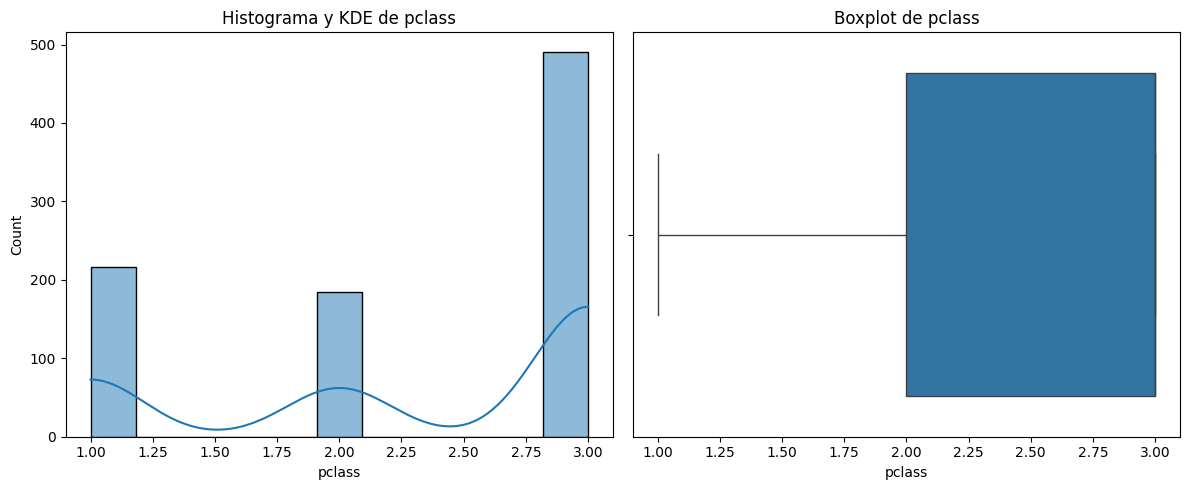

 Age tiene valores con forma Normal (Gausiana) concentrados en la edad media de 29 años
(2,)


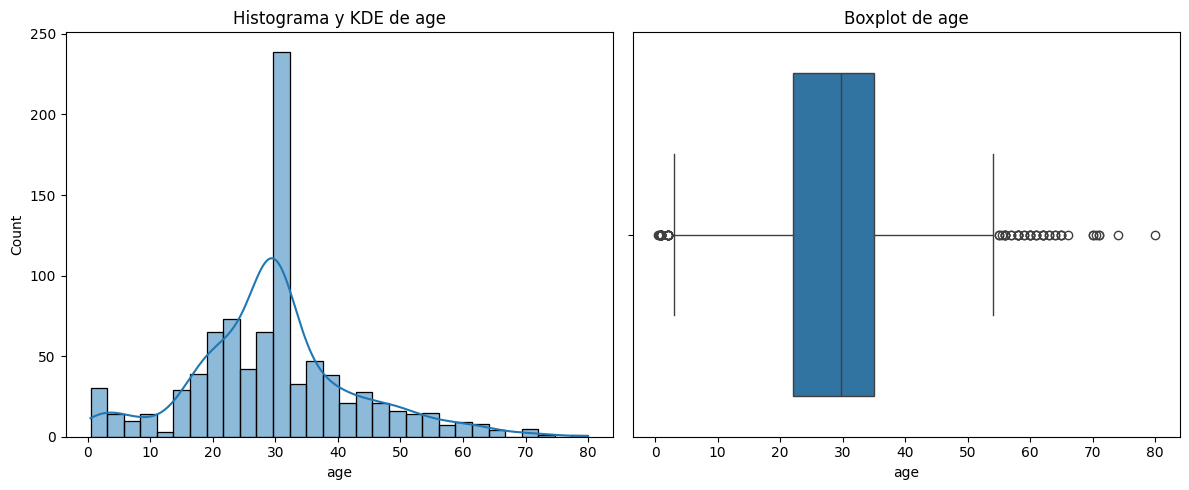

Sibsp tiene valores muy concentrados en 0 familiares, la forma del histograma parece Log Normal
(2,)


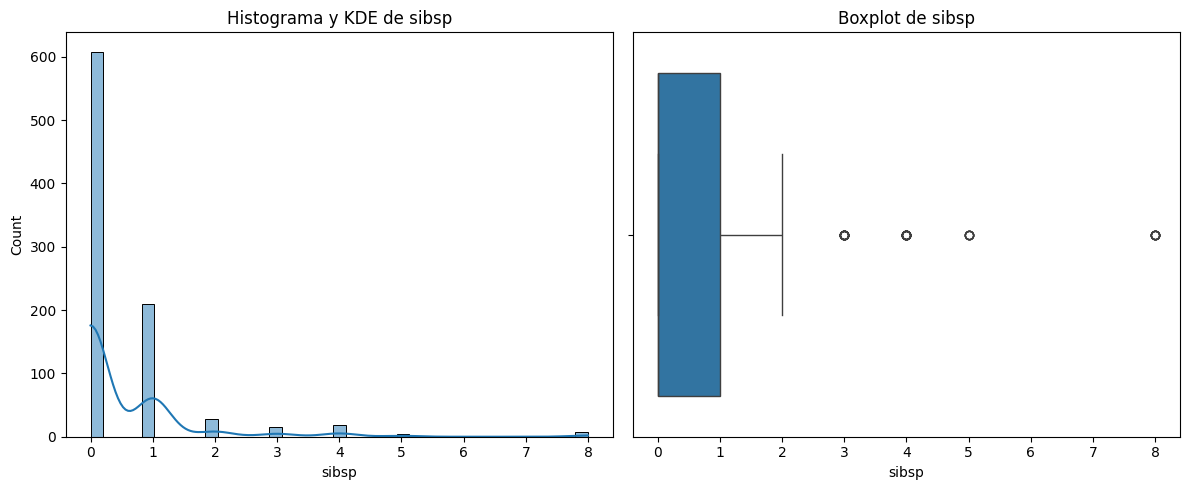

 Fare tiene valores muy concentrados al principio, muchos billetes económicos, para Log Normal
(2,)


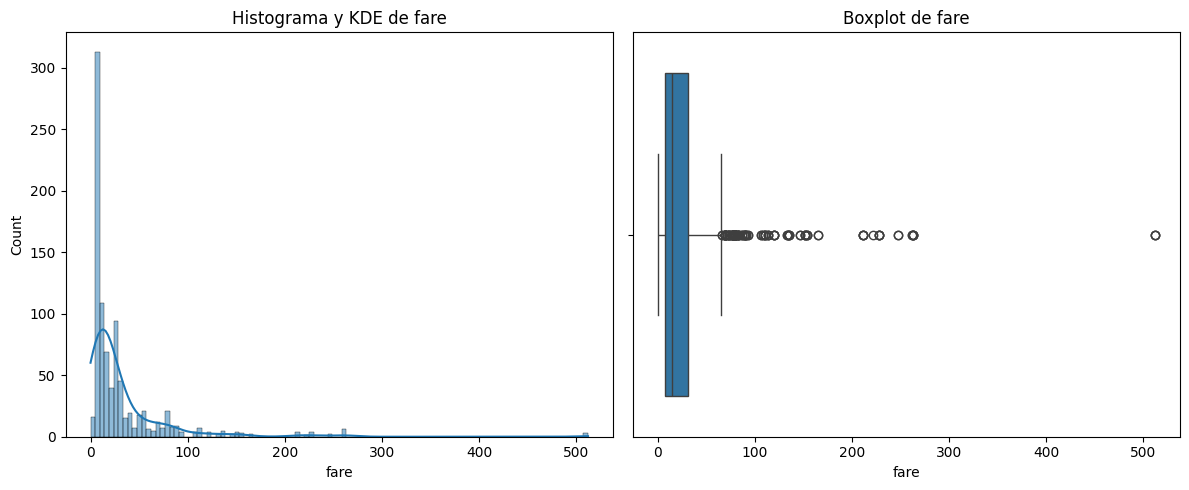

In [110]:
from bootcampviztools import plot_combined_graphs
print(f"Survived tiene valores binarios")
plot_combined_graphs(df_titanic_ajust,["survived"])


print(f"P Class tiene 3 valores siendo tercera clase el predominante")
plot_combined_graphs(df_titanic_ajust,["pclass"])


print(f" Age tiene valores con forma Normal (Gausiana) concentrados en la edad media de 29 años. Respecto a valores anómalos o outliers existen, ya que vemos que el mx es de 80 y hay alta concentración en la media, se mantendrán por si fuera interesante anaizar edad y tarifa, o edad y acompañantes, o edad y clase o edad y promedio de supervivientes ")
plot_combined_graphs(df_titanic_ajust,["age"])


print(f"Sibsp tiene valores muy concentrados en 0 familiares, la forma del histograma parece Log Normal")
plot_combined_graphs(df_titanic_ajust,["sibsp"])


print(f" Fare tiene valores muy concentrados al principio, muchos billetes económicos, para Log Normal. Junto a age tiene valores anómalos interesantes a mantener ya que reflejan diferentes precios de compra y puede ser relevante analizar que edad y clase pagaron esos billetes y si finalmente sobrevivieron los de tarifas más alta y si sobrevivieron toda la unidad familiar o no")
plot_combined_graphs(df_titanic_ajust,["fare"])

#colum_numericas= {"survived","pclass","age","sibsp", "fare"}


**REVISAR porque da valores extraños y que no concuerdan con otros


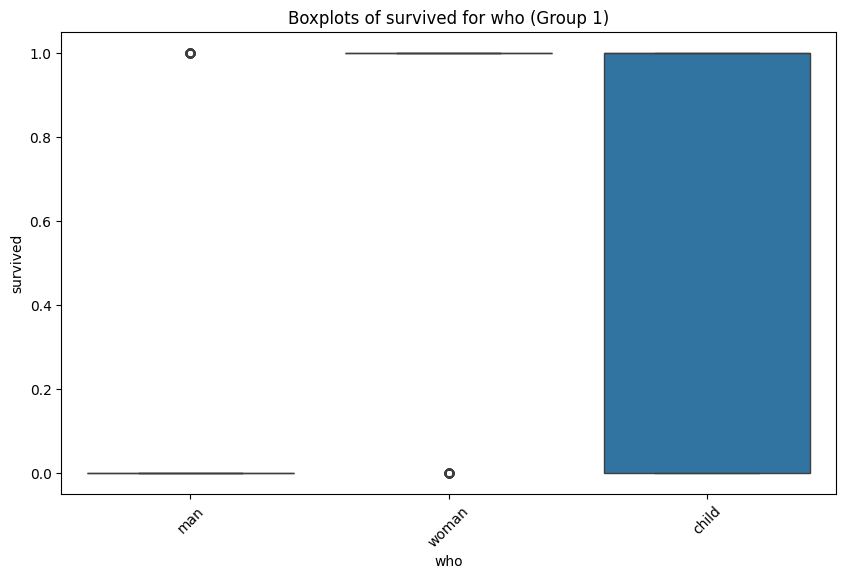

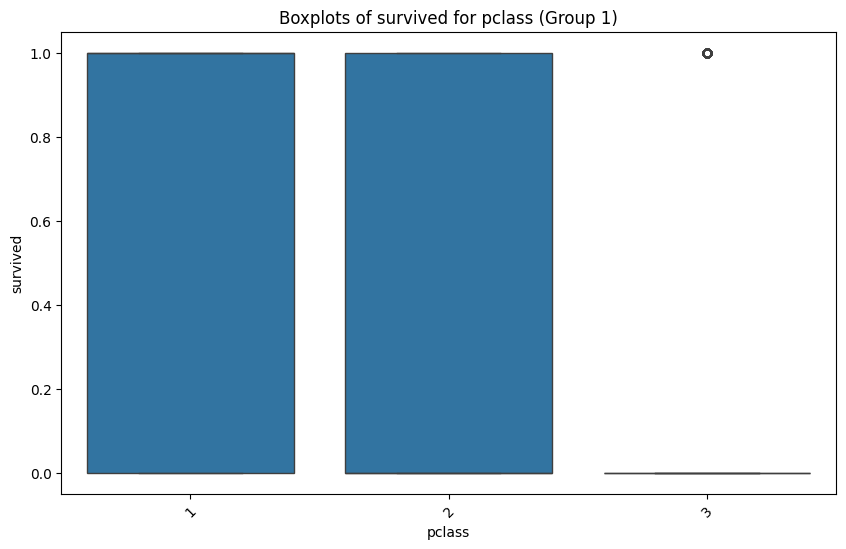

In [129]:
from bootcampviztools import plot_grouped_boxplots
print("**REVISAR porque da valores extraños y que no concuerdan con otros")
plot_grouped_boxplots(df_titanic_ajust, "who", "survived")
print("")
plot_grouped_boxplots(df_titanic_ajust, "pclass", "survived")


Dentro de los supervivientes se salvaron más del 70% de mujeres, siendo aproximadamente la suma de clase 1 y 2 60%, podría apuntar a que se salvaron las de
 dichas clases. Entorno al 60% de niños se salvaron, sólo el 30% viajaban en clase 1 y 2, lo que indica que se salvaron niños de clase 3.
 Los hombres fallecieron en su mayoría, solo el 18% sobrevivió a pesar de ser el tipo predominante.


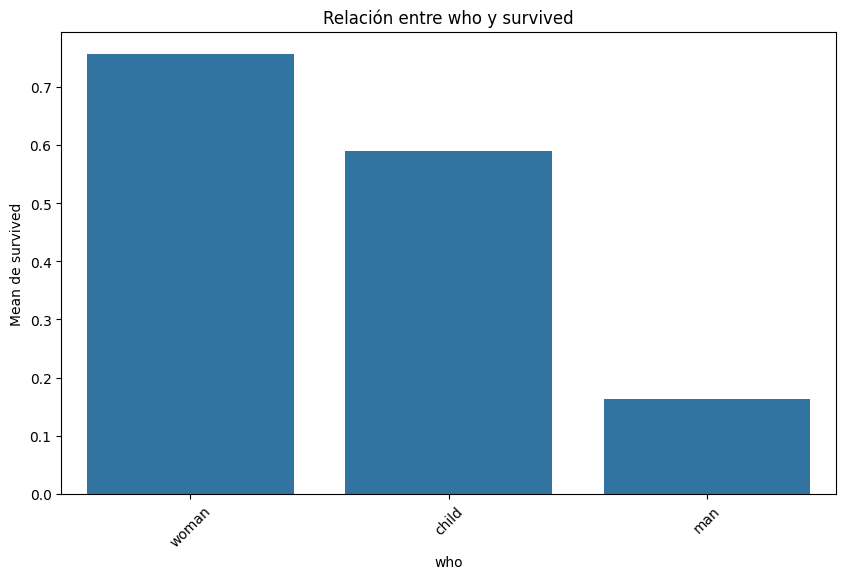

Dentro de los supervivientes se salvaron más del 70% de primera clase y el 45% de segunda clase. Menos del 30% de tercera sobrevivió, a pesar de ser la predominante, y es posible que parte fueran niños.


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


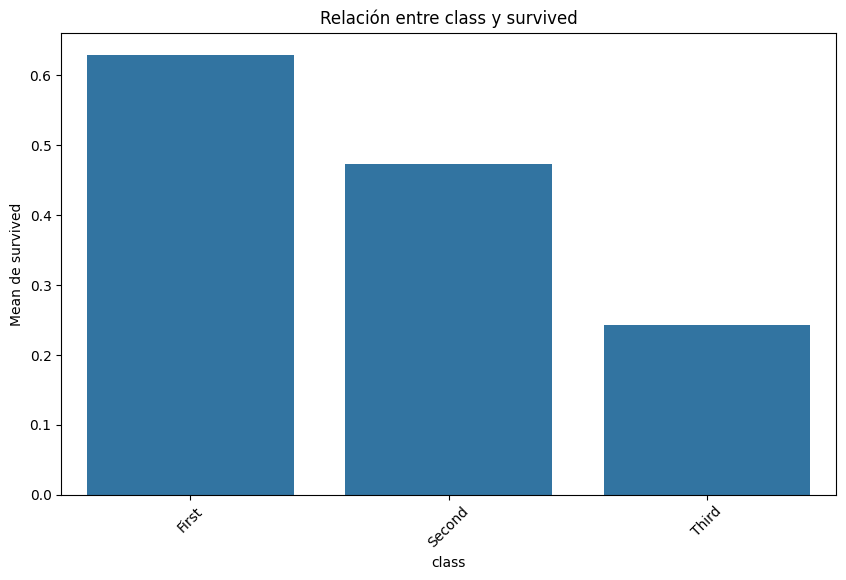

Dentro de los supervivientes se salvaron más Cheerbourg por la clase que de Southampton que era el puerto de embarque principal


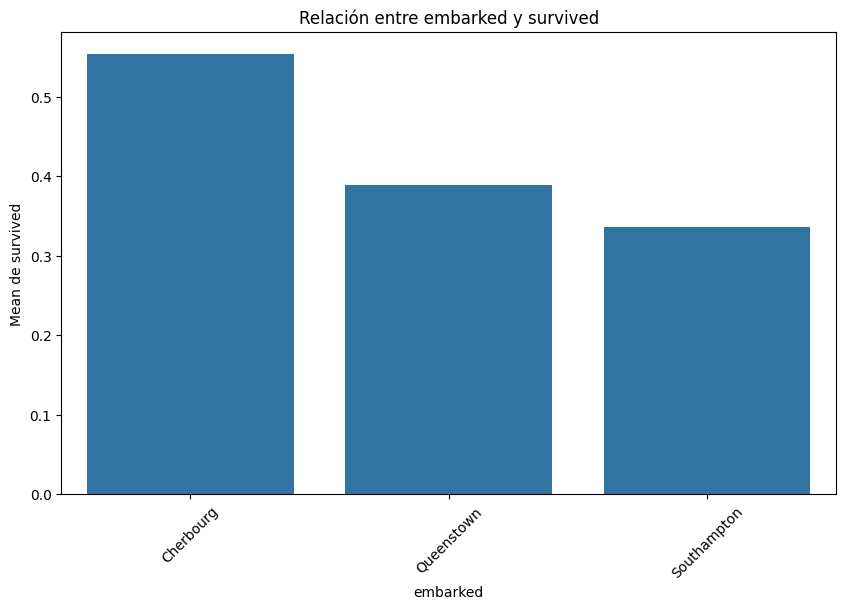

Mujeres y hombres tenían en promedio la misma edad, mientras que la edad de los niños era
 en promedio 6 años, puedo ayudar a salvarlos la prioridad en el protocolo y el espacio que ocupaban reducido en el bote.


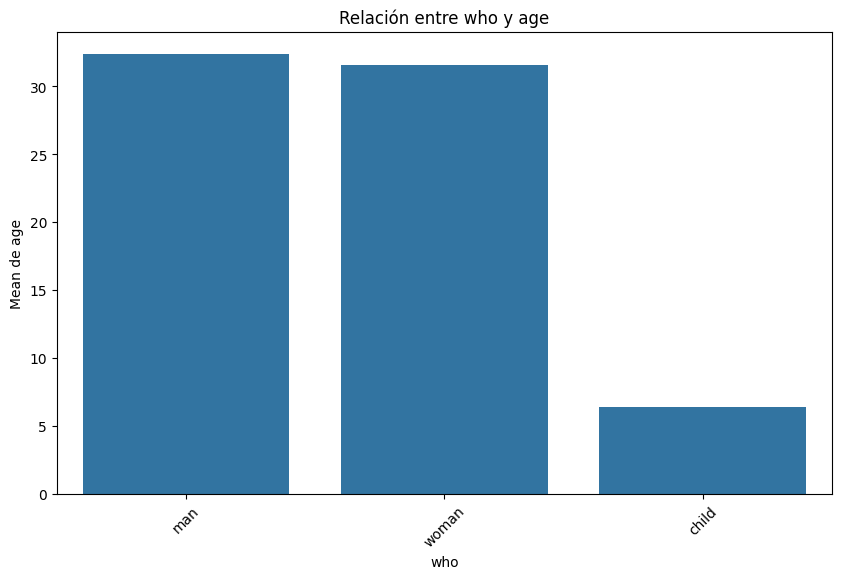

Dentro de los pasajeros la tercera clase en promedio tenía 25 años, la más joven, siendo la de mayor edad la primera.


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


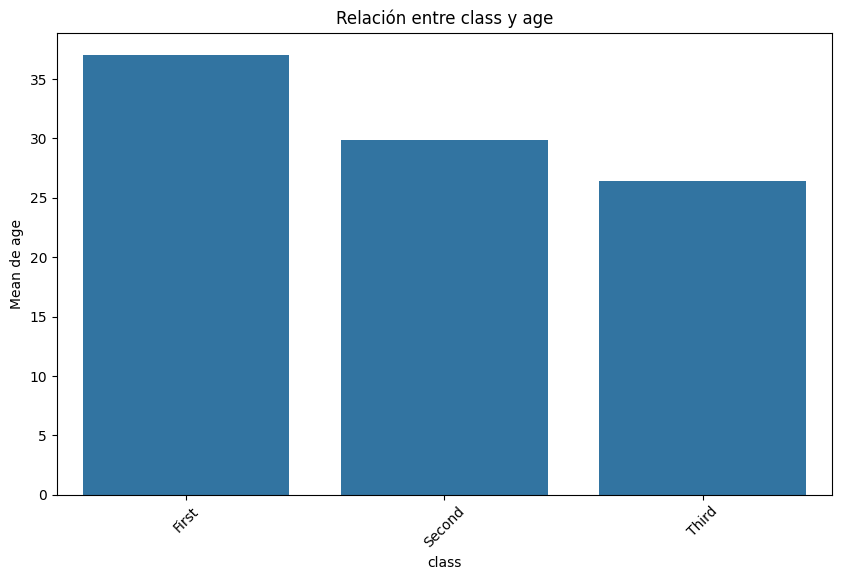

Dentro de los pasajeros la tarifa de primera clase suponía el 80%, siendo a su vez una clase minoritaria, podría reflejar una alta venta de billetes de tercera unido a las aglomeraciones en el barco dificultó el rescate.


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


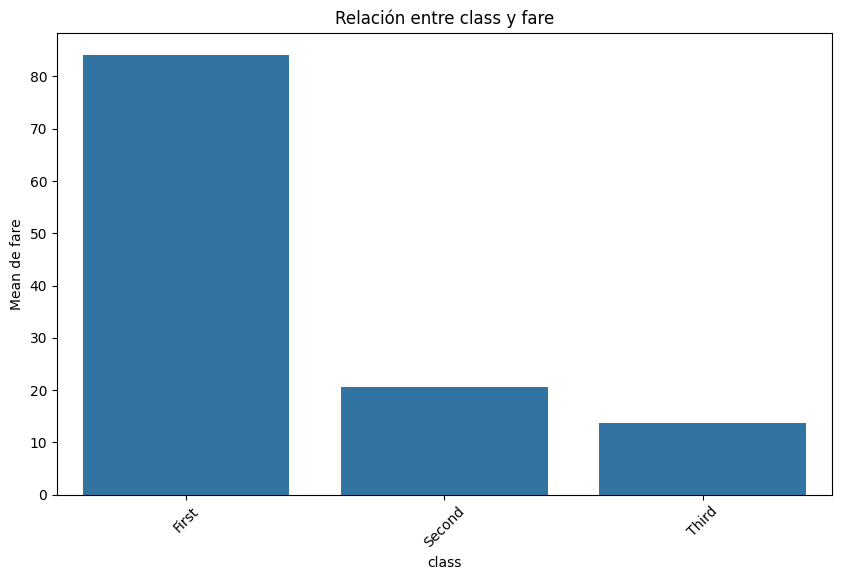

Mujeres pagaron los billetes más caros por estar en clases altas.


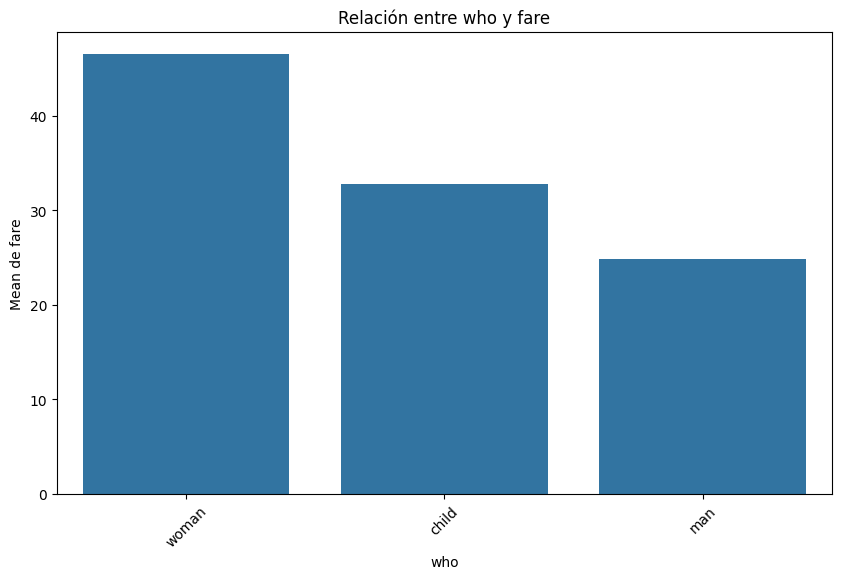

Dentro de los pasajeros la tercera clase es la que más se componía de unidades familiares afectadas por el naufragio.


c:\Users\mfm-8\Online_Env\ONLINE_DS_THEBRIDGE_MariaFernandez\03_Analisis_de_Datos\Sprint_07\Unidad_01\Practica_Obligatoria\bootcampviztools.py:109: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_data = df.groupby(categorical_col)[numerical_col].mean()


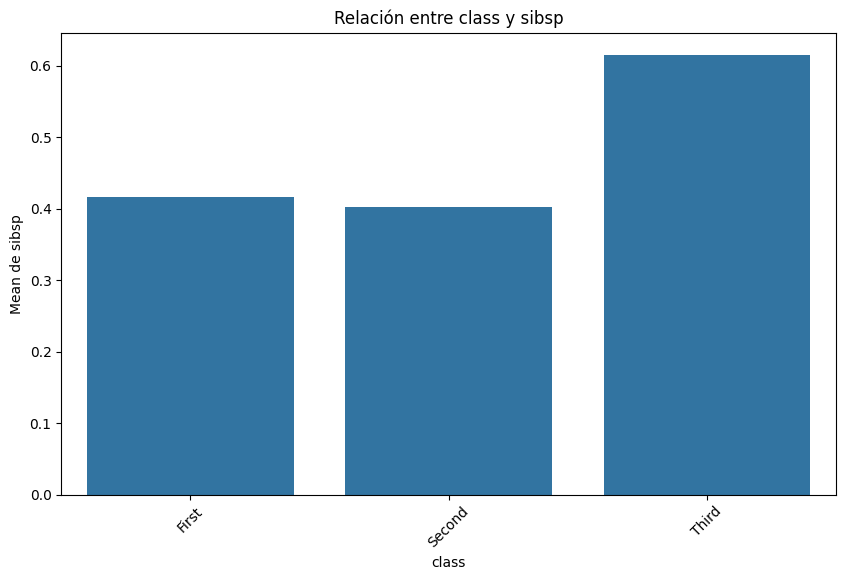

In [142]:
from bootcampviztools import plot_categorical_numerical_relationship
print("Dentro de los supervivientes se salvaron más del 70% de mujeres, siendo aproximadamente la suma de clase 1 y 2 60%, podría apuntar a que se salvaron las de\n dichas clases. Entorno al 60% de niños se salvaron, sólo el 30% viajaban en clase 1 y 2, lo que indica que se salvaron niños de clase 3.\n Los hombres fallecieron en su mayoría, solo el 18% sobrevivió a pesar de ser el tipo predominante.")
plot_categorical_numerical_relationship(df_titanic_ajust, "who", "survived", show_values=False, measure='mean')

print("Dentro de los supervivientes se salvaron más del 70% de primera clase y el 45% de segunda clase. Menos del 30% de tercera sobrevivió, a pesar de ser la predominante, y es posible que parte fueran niños.")
plot_categorical_numerical_relationship(df_titanic_ajust, "class", "survived", show_values=False, measure='mean')

print("Dentro de los supervivientes se salvaron más Cheerbourg por la clase que de Southampton que era el puerto de embarque principal")
plot_categorical_numerical_relationship(df_titanic_ajust, "embarked", "survived", show_values=False, measure='mean')

print("Mujeres y hombres tenían en promedio la misma edad, mientras que la edad de los niños era\n en promedio 6 años, puedo ayudar a salvarlos la prioridad en el protocolo y el espacio que ocupaban reducido en el bote.")
plot_categorical_numerical_relationship(df_titanic_ajust, "who", "age", show_values=False, measure='mean')

print("Dentro de los pasajeros la tercera clase en promedio tenía 25 años, la más joven, siendo la de mayor edad la primera.")
plot_categorical_numerical_relationship(df_titanic_ajust, "class", "age", show_values=False, measure='mean')

print("Dentro de los pasajeros la tarifa de primera clase suponía el 80%, siendo a su vez una clase minoritaria, podría reflejar una alta venta de billetes de tercera unido a las aglomeraciones en el barco dificultó el rescate.")
plot_categorical_numerical_relationship(df_titanic_ajust, "class", "fare", show_values=False, measure='mean')

print("Mujeres pagaron los billetes más caros por estar en clases altas.")
plot_categorical_numerical_relationship(df_titanic_ajust, "who", "fare", show_values=False, measure='mean')

print("Dentro de los pasajeros la tercera clase es la que más se componía de unidades familiares afectadas por el naufragio.")
plot_categorical_numerical_relationship(df_titanic_ajust, "class", "sibsp", show_values=False, measure='mean')





 Hay correlación  positiva entre la supervivencia y la tarifa pagada. Las personas más ricas sobrevivieron como apunta la correlación, dentro de las tarifas más económicas hay menos puntos pero los que hay podrían deberse a mujeres y niños 


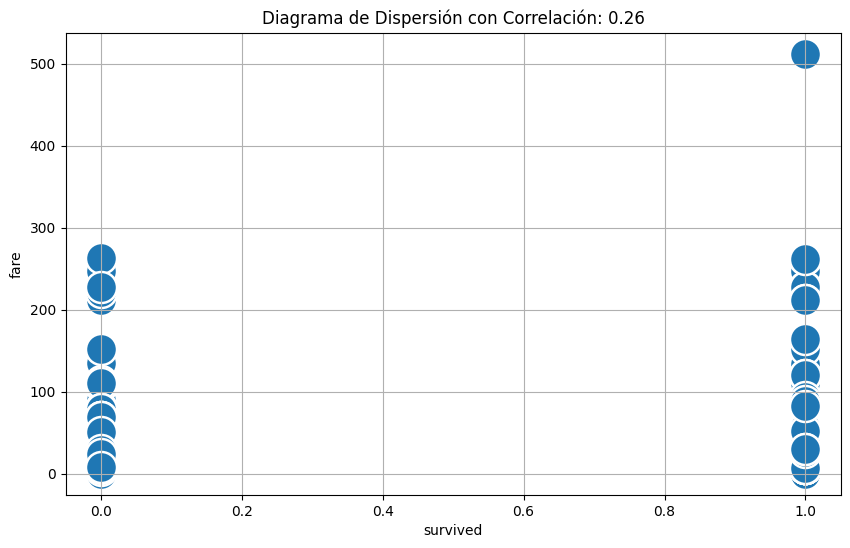

 Hay correlación ligeramente negativa entre la clase y la supervivencia.


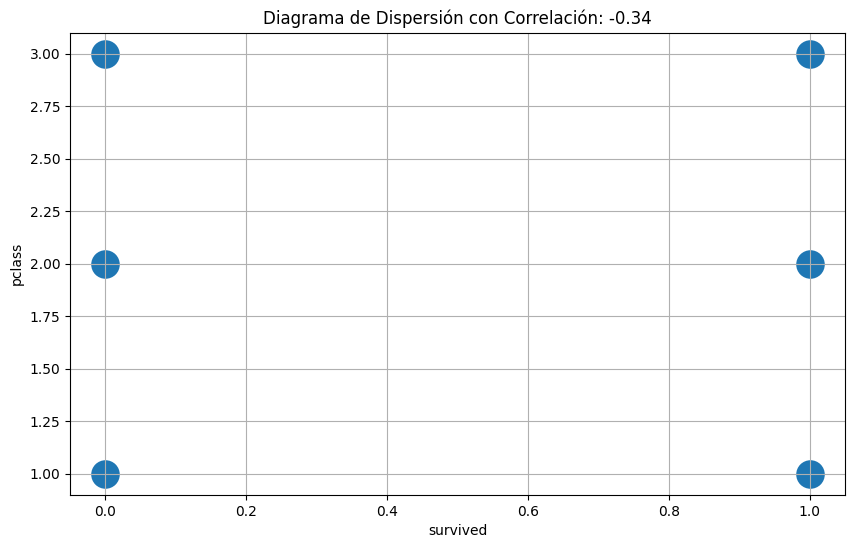

 Hay correlación ligeramente negativa entre supervivencia y edad


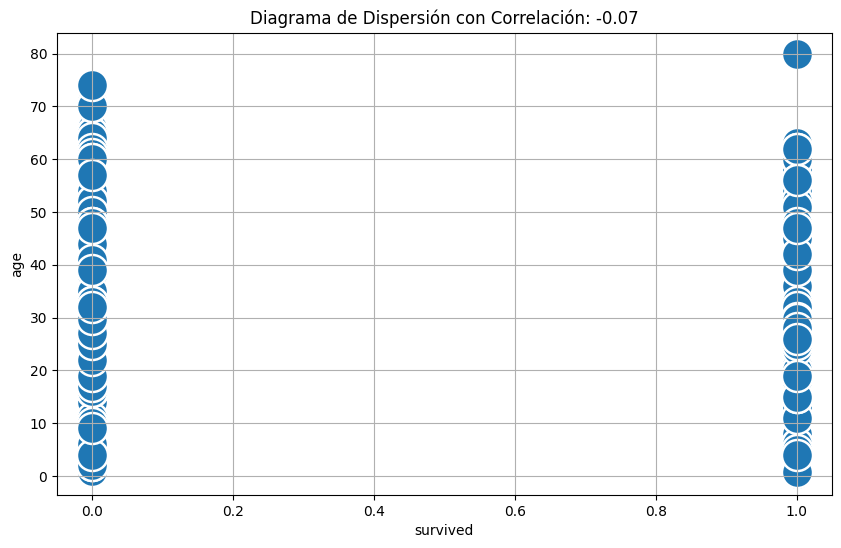

In [165]:
from bootcampviztools import grafico_dispersion_con_correlacion

#La dispersión entre diferentes variables se analiza:
print(f" Hay correlación  positiva entre la supervivencia y la tarifa pagada. Las personas más ricas sobrevivieron como apunta la correlación, dentro de las tarifas más económicas hay menos puntos pero los que hay podrían deberse a mujeres y niños ") 
grafico_dispersion_con_correlacion(df_titanic_ajust, "survived", "fare", tamano_puntos=500, mostrar_correlacion=True)


print(f" Hay correlación ligeramente negativa entre la clase y la supervivencia.") 
grafico_dispersion_con_correlacion(df_titanic_ajust, "survived", "pclass", tamano_puntos=500, mostrar_correlacion=True)


print(f" Hay correlación ligeramente negativa entre supervivencia y edad") 
grafico_dispersion_con_correlacion(df_titanic_ajust, "survived", "age", tamano_puntos=500, mostrar_correlacion=True)



In [172]:
print(f"Principales conclusiones, en el Titanic predominaban viajeros hombres jóvenes con billetes económicos y que viajaron en tercera clase.\nSin embargo la muerte de hombres fue predominante.\nRespecto a los supervivientes hay ligera correlación positiva entre la tarifa pagada y la supervivencia")

Principales conclusiones, en el Titanic predominaban viajeros hombres jóvenes con billetes económicos y que viajaron en tercera clase.
Sin embargo la muerte de hombres fue predominante.
Respecto a los supervivientes hay ligera correlación positiva entre la tarifa pagada y la supervivencia
